# Neural Networks - Learning

## 1. Visualizing the Data

Each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix 'X'. This gives us a 5000 by 400 matrix 'X' where every row is a training example for a handwritten digit image. The second part of the training set is a 5000-dimensional vector 'y' that contains labels for the training set.

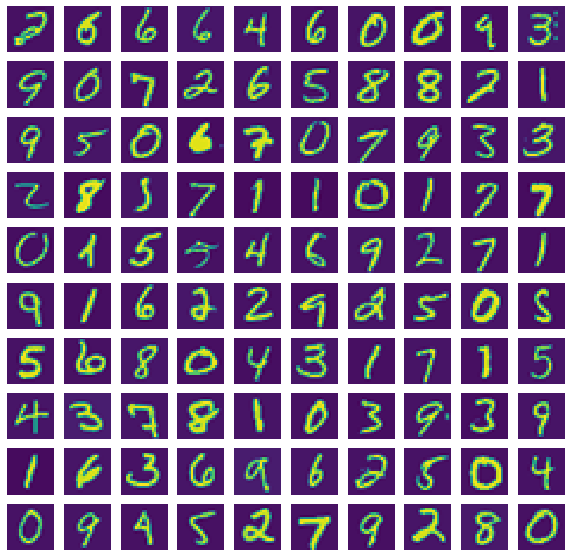

In [4]:
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
# reading the data
data = loadmat('ex4data1.mat')
X = data['X']
y = data['y']
# visualizing the data
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
       axarr[i,j].imshow(X[np.random.randint(X.shape[0])].\
reshape((20,20), order = 'F'))          
       axarr[i,j].axis('off')

## 2. Cost function

Let’s first define a few variables that we will need to use: 

 -  L = total number of layers in the network 
 -  $s_l$ = number of units (not counting bias unit) in layer L 
 -  K = number of output units/classes

Recall that in neural networks, we may have many output nodes.We denote $h_{\theta}(x)_k$ as being a hypothesis that results in the $k^{th}$ output. Our cost function for neural networks is going to be a generalization of the one we used for logistic regression. Recall that the cost function for regularized logistic regression was :

$$
\begin{gather} J(\Theta) = - \frac{1}{m} \sum_{i=1}^m  \left[y^{(i)} \log (h_\Theta (x^{(i)})) + (1 - y^{(i)})\log (1 - h_\Theta(x^{(i)}))\right] + \frac{\lambda}{2m}\sum_{j=1}^{n} \Theta_{j}^2\end{gather}
$$

For neural networks, it is going to be slightly more complicated :

$$
\begin{gather} J(\Theta) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K \left[y^{(i)}_k \log ((h_\Theta (x^{(i)}))_k) + (1 - y^{(i)}_k)\log (1 - (h_\Theta(x^{(i)}))_k)\right] + \frac{\lambda}{2m}\sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_{l+1}} ( \Theta_{j,i}^{(l)})^2\end{gather}
$$


We have added a few nested summations to account for our multiple output nodes. In the first part of the equation, before the square brackets, we have an additional nested summation that loops through the number of output nodes. 

In the regularization part, after the square brackets, we must account for multiple theta matrices. The number of columns in our current theta matrix is equal to the number of nodes in our current layer (including the bias unit). The number of rows in our current theta matrix is equal to the number of nodes in the next layer (excluding the bias unit).

 - The first part of cost function (the double sum) simply adds up the logistic regression costs calculated for each cell in the output layer
 - The second part of cost function (the triple sum) simply adds up the squares of all the individual $\Theta_s$ in the entire network.
 - The i in the second part of cost function (the triple sum) does not refer to training example i .